In [1]:
import numpy
import random

from matplotlib import pyplot
from tqdm.auto import tqdm, trange

import sys
sys.path.insert(0, "experiments")
from datasets import get_dataset
from utils import change_figax_color

In [2]:
PATHS = {
    "STED" : "/home-local2/projects/FLCDataset/20240718-dataset-full-images.tar",
    "JUMP" : "/home-local2/projects/SSL/ssl-data/jump.tar",
    "SIM" : "/home-local2/projects/FLCDataset/sim-dataset-full-images.tar",
    "HPA" : "/home-local2/projects/SSL/ssl-data/hpa.zip",
}

In [3]:
dataset = get_dataset("JUMP", PATHS["JUMP"])

In [4]:
print("Number of images: ", len(dataset))
shapes = [dataset.get_data(i)["image"].shape for i in trange(len(dataset))]
shapes = numpy.array(shapes)

# Computes how many crops of size (size, size) can be extracted from an image of size (h, w)
def compute_crops(h, w, size):
    count = 0
    for j in range(0, h, size):
        for i in range(0, w, size):
            count += 1
    return count
print("Number of crops (approx): ", sum([compute_crops(h, w, 224) for h, w in shapes]))


Number of images:  143925


  0%|          | 0/143925 [00:00<?, ?it/s]

Number of crops (approx):  3701518


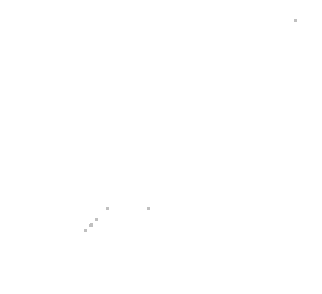

In [5]:
fig, ax = pyplot.subplots(figsize=(3,3))
ax.scatter(shapes[:, 1], shapes[:, 0], s=1, color="silver")
ax.set(
    xlabel="Width (px)",
    ylabel="Height (px)",
    aspect="equal",
)
change_figax_color(fig)
pyplot.show()


<TarInfo '/home/frbea320/scratch/Datasets/JUMP_CP/cpg0016-jump/source_10/images/2021_05_31_U2OS_48_hr_run1/images/Dest210531-152149/Dest210531-152149_P06_T0001F002L01A03Z01C04.tif' at 0x7f893ab93c40>


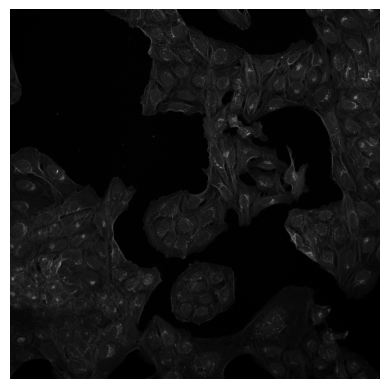

<TarInfo '/home/frbea320/scratch/Datasets/JUMP_CP/cpg0016-jump/source_1/images/Batch1_20221004/images/UL000109__2022-10-05T06_35_06-Measurement1/Images/r06c45f01p01-ch5sk1fk1fl1.tiff' at 0x7f893b546500>


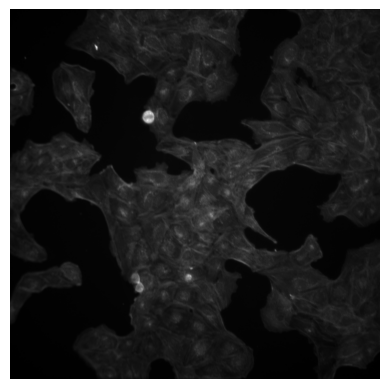

<TarInfo '/home/frbea320/scratch/Datasets/JUMP_CP/cpg0016-jump/source_3/images/CP59/images/BR5867a3__2022-04-29T01_02_16-Measurement 1/Images/r06c17f07p01-ch5sk1fk1fl1.tiff' at 0x7f8936e9fc40>


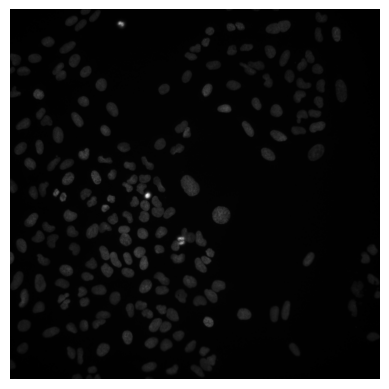

<TarInfo '/home/frbea320/scratch/Datasets/JUMP_CP/cpg0016-jump/source_2/images/20210607_Batch_2/images/1053601756/1053601756_I05_T0001F005L01A02Z01C02.tif' at 0x7f89378d6f80>


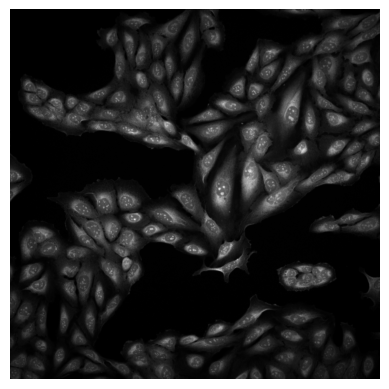

<TarInfo '/home/frbea320/scratch/Datasets/JUMP_CP/cpg0016-jump/source_2/images/20210607_Batch_2/images/1053601756/1053601756_D07_T0001F002L01A06Z02C06.tif' at 0x7f8939c96200>


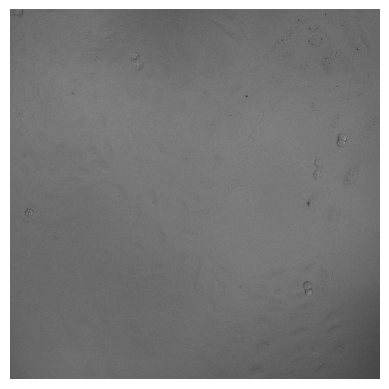

<TarInfo '/home/frbea320/scratch/Datasets/JUMP_CP/cpg0016-jump/source_11/images/Batch1/images/EC000001__2021-05-27T17_24_29-Measurement1/Images/r05c20f03p01-ch5sk1fk1fl1.tiff' at 0x7f89395ea500>


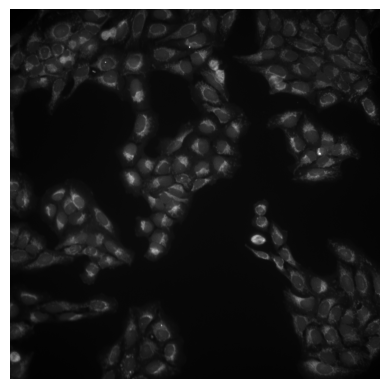

<TarInfo '/home/frbea320/scratch/Datasets/JUMP_CP/cpg0016-jump/source_10/images/2021_05_31_U2OS_48_hr_run1/images/Dest210531-152149/Dest210531-152149_N06_T0001F001L01A01Z01C01.tif' at 0x7f8940964640>


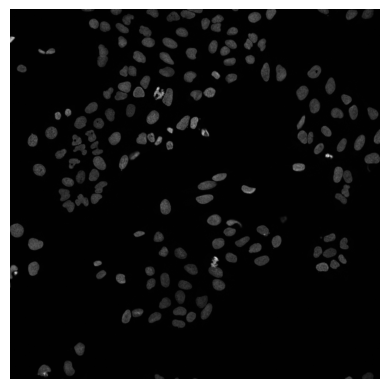

<TarInfo '/home/frbea320/scratch/Datasets/JUMP_CP/cpg0016-jump/source_9/images/20210824-Run5/images/GR00003381/Images/r10c41f04p01-ch3sk1fk1fl1.tiff' at 0x7f8936c3cac0>


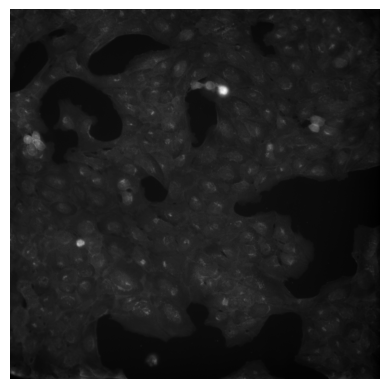

<TarInfo '/home/frbea320/scratch/Datasets/JUMP_CP/cpg0016-jump/source_10/images/2021_05_31_U2OS_48_hr_run1/images/Dest210531-152149/Dest210531-152149_J17_T0001F001L01A02Z01C02.tif' at 0x7f893a026ec0>


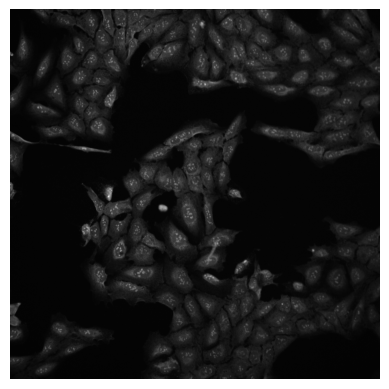

<TarInfo '/home/frbea320/scratch/Datasets/JUMP_CP/cpg0016-jump/source_6/images/p210824CPU2OS48hw384exp022JUMP/images/110000293081/110000293081_H15_T0001F008L01A01Z01C05.tif' at 0x7f89379a81c0>


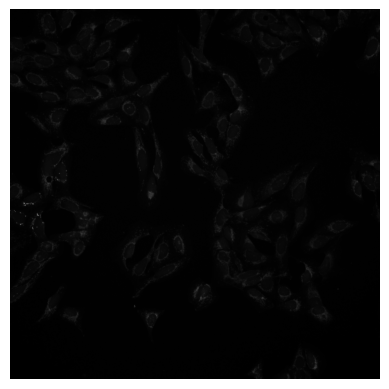

In [6]:
from matplotlib_scalebar.scalebar import ScaleBar
random.seed(42)
for _ in range(10):
    idx = random.randint(0, len(dataset) - 1)
    data = dataset.get_data(idx)
    print(dataset.members[idx])

    fig, ax = pyplot.subplots(frameon=False)

    if "metadata" in data:
        metadata = data["metadata"].item()
        if "msr-metadata" in metadata:
            scalebar = ScaleBar(metadata["msr-metadata"]["PhysicalSizeX"], metadata["msr-metadata"]["PhysicalSizeXUnit"], location="lower right", frameon=False, color="white", scale_loc="top")
            ax.add_artist(scalebar)
    ax.imshow(data["image"], cmap="gray", vmin=0, vmax=255)
    ax.axis("off")
    pyplot.show()